In [3]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import scipy.optimize
import functools
 
%matplotlib inline

In [2]:
import emcee

In [5]:
A=np.loadtxt('prueba8_021_000_stars.pv')

In [6]:
A.shape

(400000, 6)

In [7]:
A

array([[-265.317   ,   83.3648  ,   13.703   ,  -53.5575  ,   58.8388  ,
         -11.979   ],
       [-264.828   ,   82.1106  ,   14.4016  , -146.033   ,    1.54183 ,
         -19.9653  ],
       [-255.225   ,   78.3771  ,   17.4108  ,  -27.5153  ,  -93.3119  ,
          50.2527  ],
       ..., 
       [-273.183   ,   90.6721  ,   -2.28066 ,   44.0555  ,  -43.8387  ,
         -12.8788  ],
       [-265.652   ,   95.2803  ,    4.34398 ,  -52.7     ,    0.817127,
           6.7025  ],
       [-266.486   ,   91.2346  ,   12.9889  ,  -61.757   ,  -77.9654  ,
         -36.6743  ]])

In [7]:
def plane(x, y, params):
    a = params[0]
    b = params[1]
    c = params[2]
    z = a*x + b*y + c
    return z

In [78]:
sizei=200000
#sizef=400000
sizef=sizei+1000
xs=A[sizei:sizef,0]
ys=A[sizei:sizef,1]
zs=A[sizei:sizef,2]

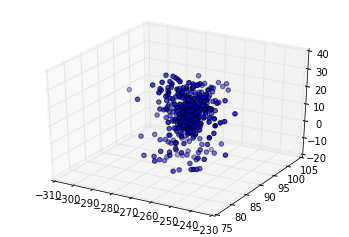

In [62]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(xs, ys, zs)

plt.show()

In [34]:
def error(params, points):
    result = 0
    for (x,y,z) in points:
        plane_z = plane(x, y, params)
        diff = abs(plane_z - z)
        result += diff**2
    return result

In [81]:
data=np.vstack((xs,ys,zs)).T
points=list(map(tuple, data))

In [82]:
data

array([[-272.634  ,   92.6365 ,    9.51636],
       [-267.385  ,   91.0876 ,   10.5612 ],
       [-266.374  ,   91.0134 ,    9.84188],
       ..., 
       [-265.064  ,   93.6775 ,    2.3859 ],
       [-267.105  ,   91.5744 ,   11.4696 ],
       [-268.966  ,   91.7201 ,    7.30029]])

In [64]:
fun = functools.partial(error, points=points)

In [65]:
fun([0, 0, 0])

139066.45891153003

In [68]:
params0 = [1, 1, 1]
res = scipy.optimize.minimize(fun, params0)

In [69]:
res

   status: 2
  success: False
     njev: 77
     nfev: 397
 hess_inv: array([[  1.21026143e-05,   3.10633520e-05,   3.96928793e-04],
       [  3.10633520e-05,   8.85287665e-05,   2.21527953e-04],
       [  3.96928793e-04,   2.21527953e-04,   8.57478358e-02]])
      fun: 42586.588218348887
        x: array([  0.10296319,   0.2629122 ,  13.31367692])
  message: 'Desired error not necessarily achieved due to precision loss.'
      jac: array([ 0.00585938, -0.00292969,  0.        ])

In [70]:
res.x[0]

0.10296318997261147

In [13]:
def cross(a, b):
    return [a[1]*b[2] - a[2]*b[1],
            a[2]*b[0] - a[0]*b[2],
            a[0]*b[1] - a[1]*b[0]]

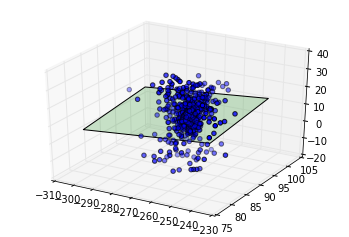

In [80]:
a = res.x[0]
b = res.x[1]
c = res.x[2]

#xs, ys, zs = zip(*points)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(xs, ys, zs)

point  = np.array([0.0, 0.0, c])
normal = np.array(cross([1,0,a], [0,1,b]))
d = -point.dot(normal)
xx, yy = np.meshgrid([xs.min(),xs.max()], [ys.min(),ys.max()])
z = (-normal[0] * xx - normal[1] * yy - d) * 1. /normal[2]
ax.plot_surface(xx, yy, z, alpha=0.2, color=[0,1,0])


plt.show()

In [9]:
# Estos son los datos que usamos
sizei=200000
sizef=400000
#sizef=sizei+1000
xs=A[sizei:sizef,0]
ys=A[sizei:sizef,1]
zs=A[sizei:sizef,2]
data=np.vstack((xs,ys,zs)).T

In [10]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
x_proj=pca.fit_transform(data)
print(pca.explained_variance_)
print(pca.components_)

[ 35.82981879  22.29875623]
[[ 0.21539389 -0.00839967  0.97649113]
 [-0.94391472  0.25447599  0.21039718]]


In [11]:
pca.explained_variance_.sum()

58.128575028139039

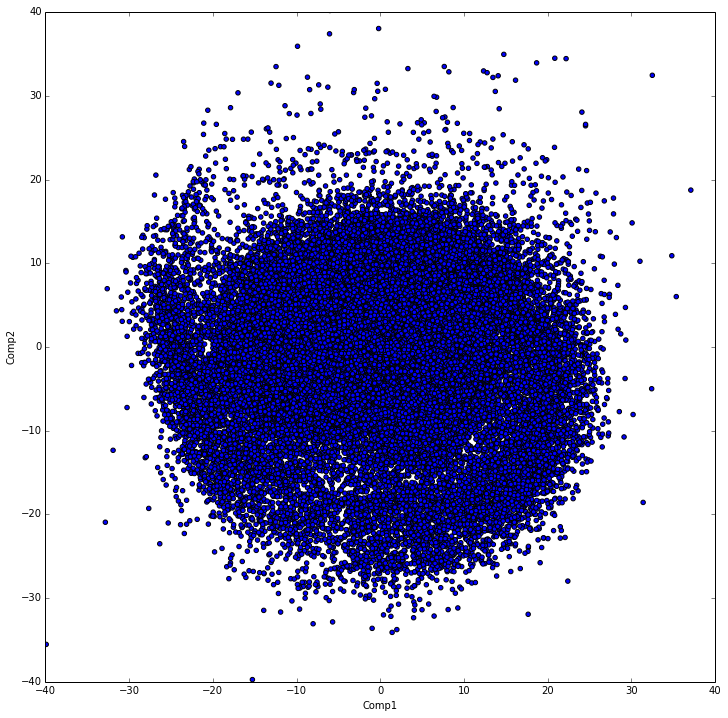

In [95]:
plt.figure(figsize=(12,12))
plt.scatter(x_proj[:, 0],x_proj[:, 1])
plt.xlim(-40,40)
plt.ylim(-40,40)
plt.xlabel('Comp1')
plt.ylabel('Comp2')

In [14]:
n,m,l=cross(pca.components_[0],pca.components_[1])

In [15]:
n,m,l

(-0.25026081073646522, -0.96704261415526804, 0.046883995321139141)

In [106]:
a=-n/l
b=-m/l
c=(n*xs.mean()+m*ys.mean()+l*zs.mean())/l

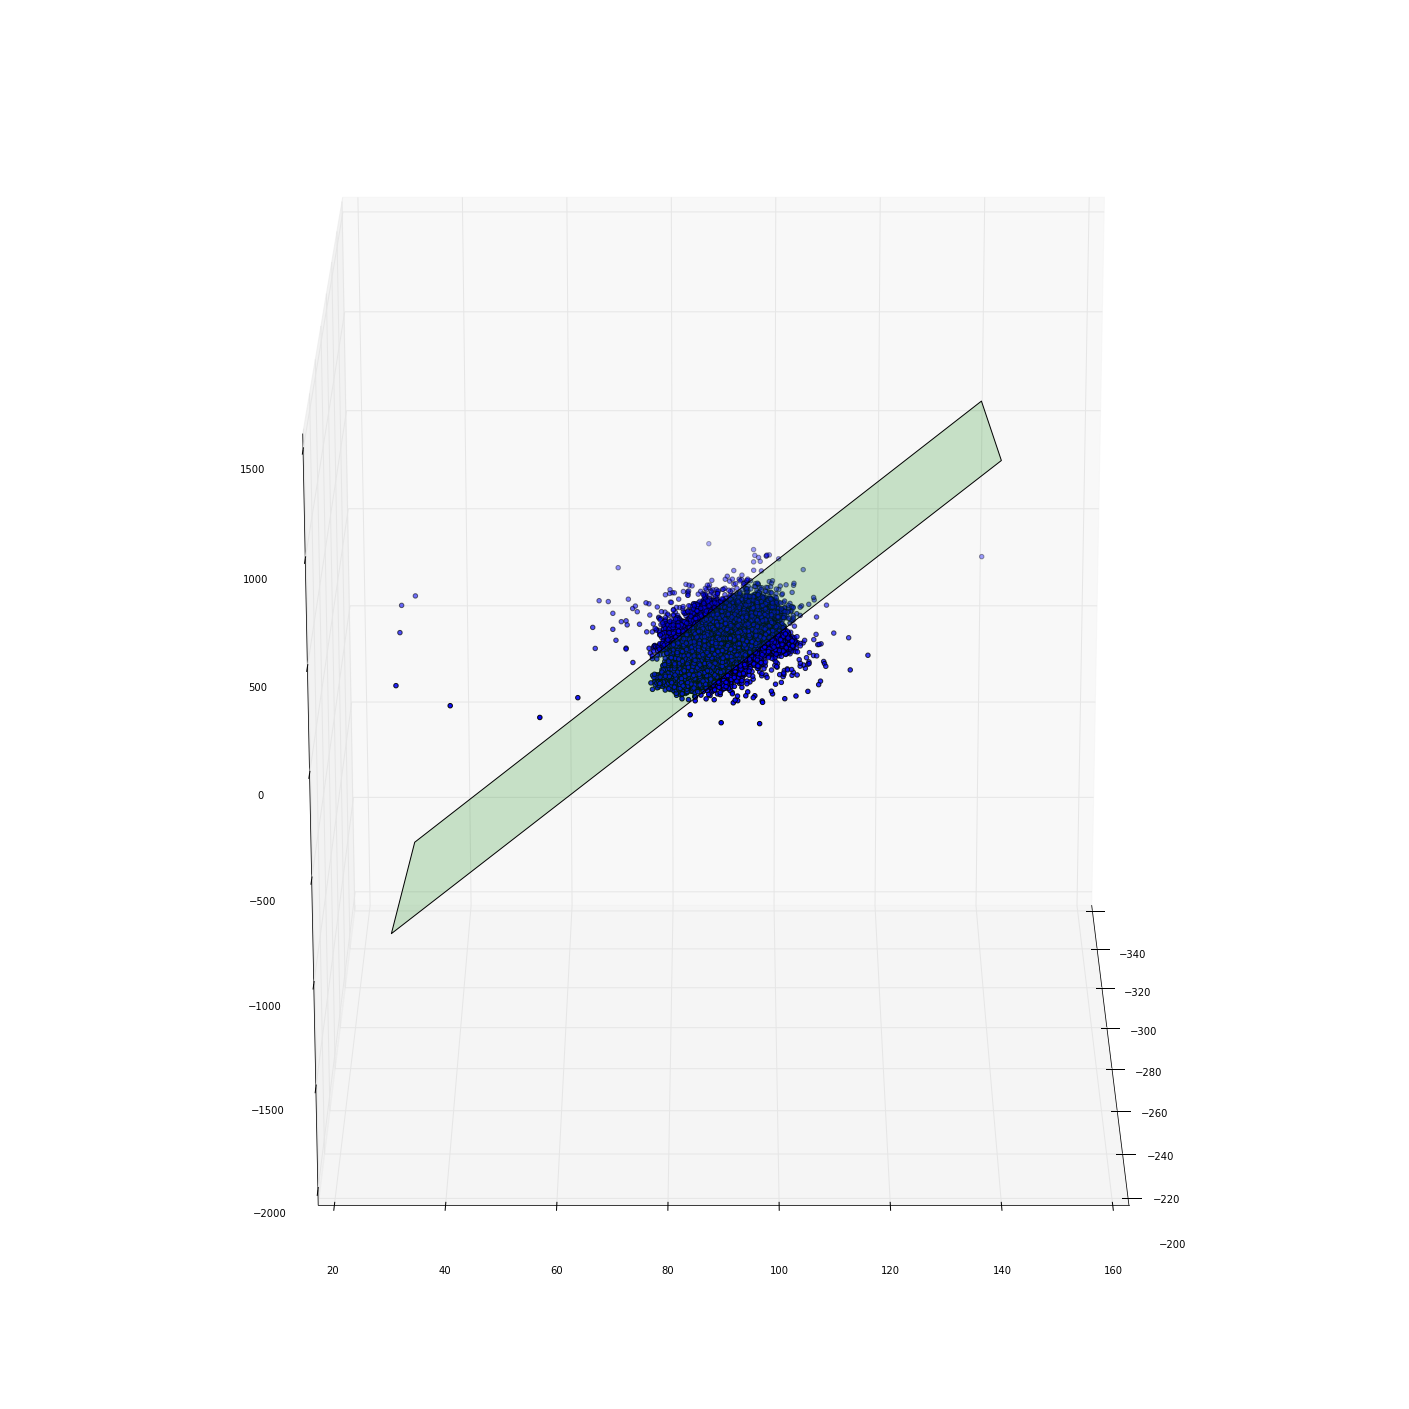

In [125]:
fig = plt.figure(figsize=(25,25))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(xs, ys, zs)

point  = np.array([0.0, 0.0, c])
normal = np.array(cross([1,0,a], [0,1,b]))
d = -point.dot(normal)
xx, yy = np.meshgrid([xs.min(),xs.max()], [ys.min(),ys.max()])
z = (-normal[0] * xx - normal[1] * yy - d) * 1. /normal[2]
ax.plot_surface(xx, yy, z, alpha=0.2, color=[0,1,0])
ax.view_init(elev=20., azim=0)
plt.show()

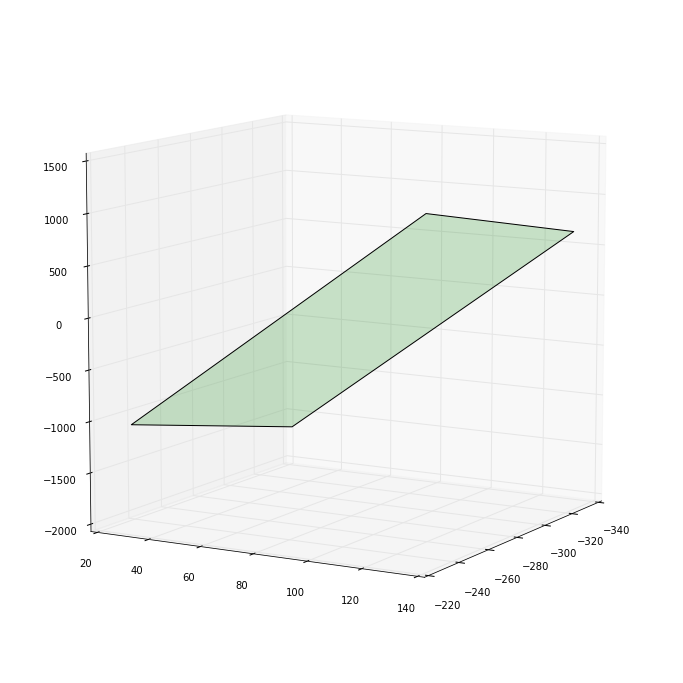

In [119]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')



#ax.scatter(xs, ys, zs)

point  = np.array([0.0, 0.0, c])
normal = np.array(cross([1,0,a], [0,1,b]))
d = -point.dot(normal)
xx, yy = np.meshgrid([xs.min(),xs.max()], [ys.min(),ys.max()])
z = (-normal[0] * xx - normal[1] * yy - d) * 1. /normal[2]
ax.plot_surface(xx, yy, z, alpha=0.2, color=[0,1,0])

ax.view_init(elev=10., azim=30)

plt.show()